In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np


Data loaded successfully.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(13)

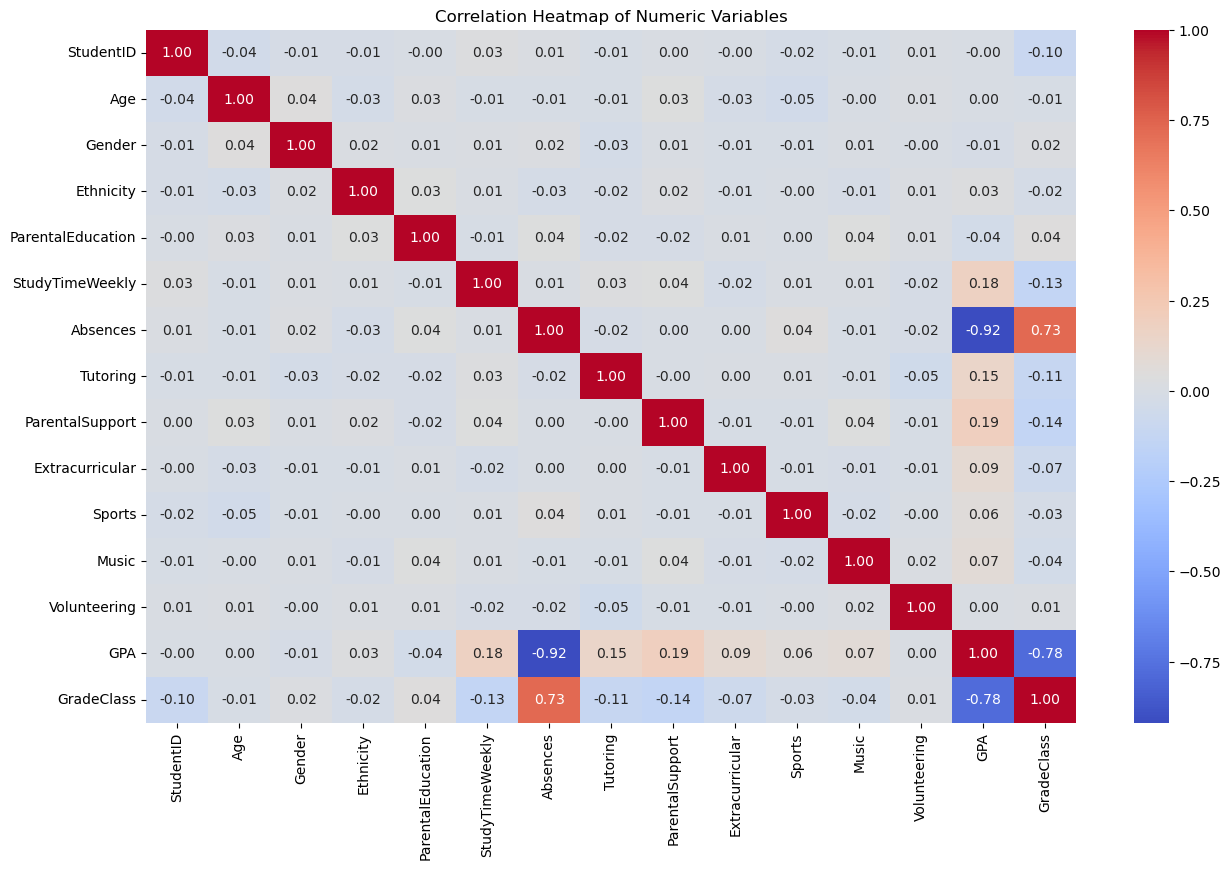


Categorical columns:
[]
Analysis complete. Please review the generated visualizations and the printed information about the dataset structure.


In [7]:

# File path
file_path = r"C:\Users\Nick Lawson\OneDrive\Documents\Project1\Student performance data.csv"

# Load the dataset
try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path.")
    exit()
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty.")
    exit()
except pd.errors.ParserError:
    print(f"Error: Unable to parse '{file_path}'. Please check if it's a valid CSV file.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")
    exit()

# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())

print("\nColumn names:")
print(df.columns.tolist())

print("\nFirst few rows of the dataset:")
print(df.head())

# Function to create plots
def create_plot(x, y, data, title, xlabel, ylabel, kind='scatter'):
    plt.figure(figsize=(10, 6))
    if kind == 'scatter':
        sns.scatterplot(x=x, y=y, data=data)
    elif kind == 'bar':
        sns.barplot(x=x, y=y, data=data)
    elif kind == 'box':
        sns.boxplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Identify numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric columns:")
print(numeric_columns)

# Create correlation heatmap for numeric columns
if len(numeric_columns) > 1:
    correlation_matrix = df[numeric_columns].corr()
    plt.figure(figsize=(15, 9))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Variables')
    plt.show()

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical columns:")
print(categorical_columns)

# Create box plots for each numeric column grouped by each categorical column
for num_col in numeric_columns:
    for cat_col in categorical_columns:
        create_plot(cat_col, num_col, df, f'{num_col} by {cat_col}', cat_col, num_col, kind='box')

print("Analysis complete. Please review the generated visualizations and the printed information about the dataset structure.")

In [9]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols, logit


In [11]:
# Load the dataset
file_path = 'Student performance data.csv'
student_data = pd.read_csv(file_path)

In [13]:
# Initial inspection of the data
print("Initial Data Information:")
print(student_data.info())
print("\nInitial Data Summary:")
print(student_data.describe())

Initial Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 280.4 K

In [15]:
# Cleaning and transforming the data

# 1. Handle Missing Values
# Check for missing values
missing_values = student_data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [17]:
# Drop rows with missing values (if any)
student_data_cleaned = student_data.dropna()

# 2. Remove Duplicates
# Check for duplicate rows
duplicates = student_data_cleaned.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)

# Drop duplicate rows (if any)
student_data_cleaned = student_data_cleaned.drop_duplicates()



Number of Duplicate Rows: 0


In [1]:
# 3. Data Type Conversion (if needed)
# Convert categorical columns to appropriate data types
student_data_cleaned['Gender'] = student_data_cleaned['Gender'].astype('category')
student_data_cleaned['Ethnicity'] = student_data_cleaned['Ethnicity'].astype('category')
student_data_cleaned['ParentalEducation'] = student_data_cleaned['ParentalEducation'].astype('category')
student_data_cleaned['ParentalSupport'] = student_data_cleaned['ParentalSupport'].astype('category')
student_data_cleaned['Sports'] = student_data_cleaned['Sports'].astype('category')
student_data_cleaned['Music'] = student_data_cleaned['Music'].astype('category')
student_data_cleaned['GradeClass'] = student_data_cleaned['GradeClass'].astype('category')


NameError: name 'student_data_cleaned' is not defined

In [19]:

# Convert GPA to Grade Categories
def categorize_gpa(gpa):
    if gpa >= 3.5:
        return 'A'
    elif gpa >= 3.0:
        return 'B'
    elif gpa >= 2.5:
        return 'C'
    elif gpa >= 2.0:
        return 'D'
    else:
        return 'F'

student_data_cleaned['GradeCategory'] = student_data_cleaned['GPA'].apply(categorize_gpa)

# 5. Renaming Columns for Clarity (if needed)
student_data_cleaned.rename(columns={'GradeClass': 'GradeLevel'}, inplace=True)

# 6. Resetting Index
student_data_cleaned.reset_index(drop=True, inplace=True)

# Final data summary after cleaning and transformation
print("\nCleaned Data Information:")
print(student_data_cleaned.info())
print("\nCleaned Data Summary:")
print(student_data_cleaned.describe())




Cleaned Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeLevel         2392 non-null   int64  
 15  GradeCategory      2392 non-null   object 
dt

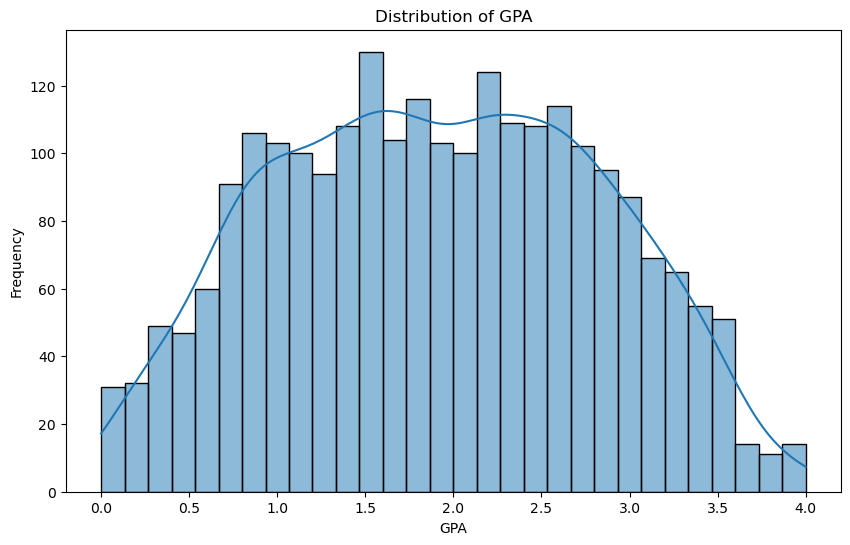

In [21]:
# Chart 1: Distribution of GPA
plt.figure(figsize=(10, 6))
sns.histplot(student_data['GPA'], bins=30, kde=True)
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

C:\Users\Nick Lawson\AppData\Local\Temp\ipykernel_3616\1500939137.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sports', y='GPA', data=student_data, ci=None)


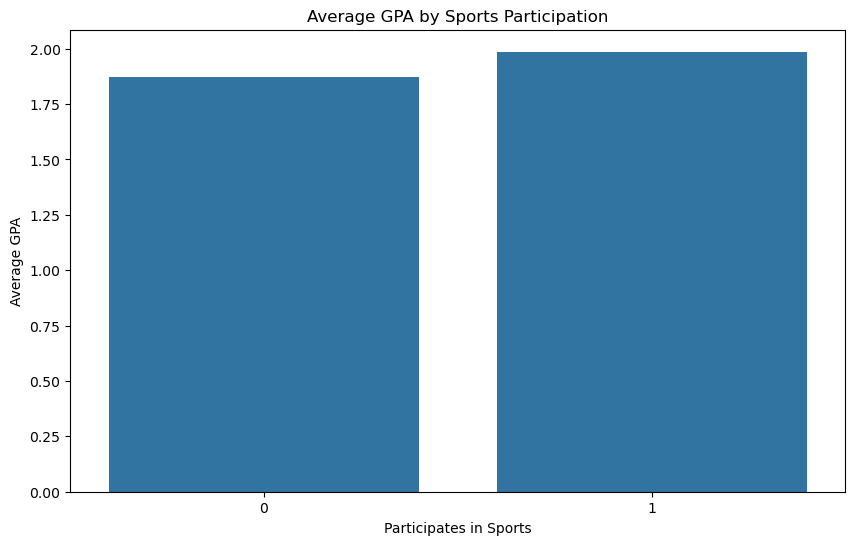

In [23]:
# Chart 2: Average GPA by Sports Participation
plt.figure(figsize=(10, 6))
sns.barplot(x='Sports', y='GPA', data=student_data, ci=None)
plt.title('Average GPA by Sports Participation')
plt.xlabel('Participates in Sports')
plt.ylabel('Average GPA')
plt.show()

C:\Users\Nick Lawson\AppData\Local\Temp\ipykernel_3616\638540048.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Music', y='GPA', data=student_data, ci=None)


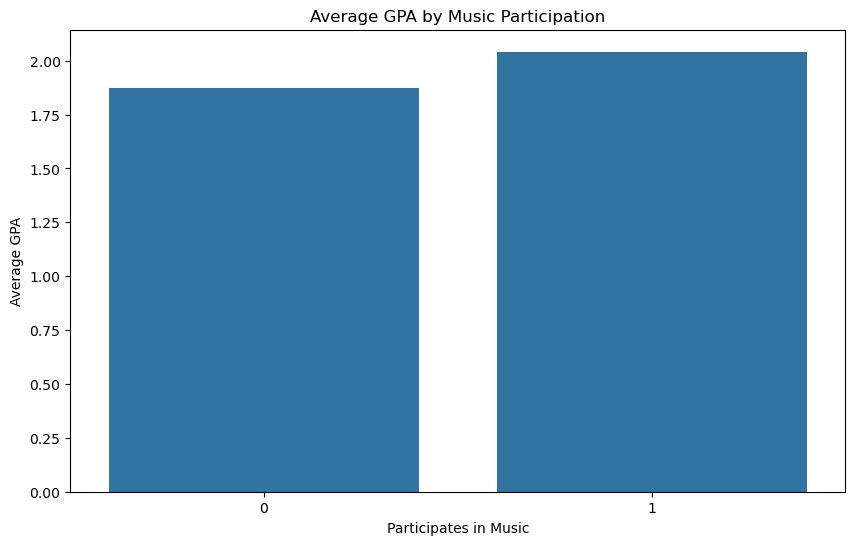

In [25]:
# Chart 3: Average GPA by Music Participation
plt.figure(figsize=(10, 6))
sns.barplot(x='Music', y='GPA', data=student_data, ci=None)
plt.title('Average GPA by Music Participation')
plt.xlabel('Participates in Music')
plt.ylabel('Average GPA')
plt.show()


C:\Users\Nick Lawson\AppData\Local\Temp\ipykernel_3616\3242620485.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ParentalSupport', y='GPA', data=student_data, ci=None)


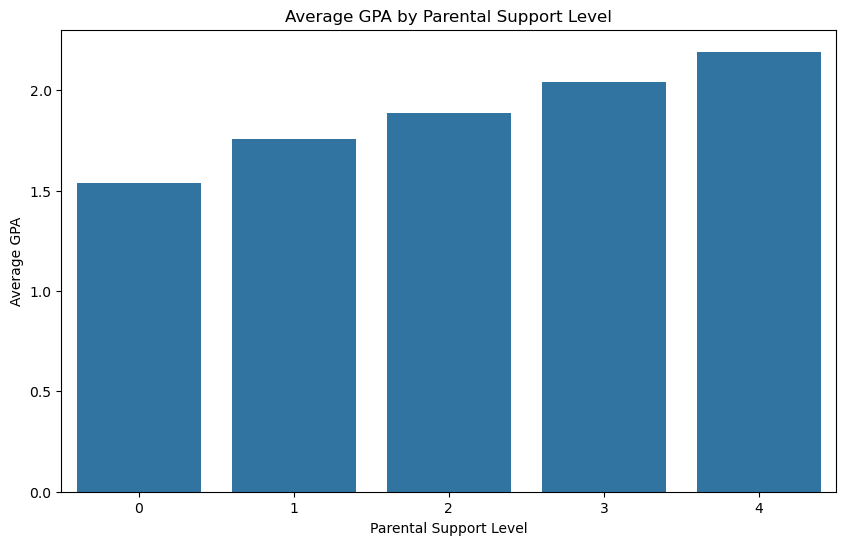

In [27]:
# Chart 4: Average GPA by Parental Support Level
plt.figure(figsize=(10, 6))
sns.barplot(x='ParentalSupport', y='GPA', data=student_data, ci=None)
plt.title('Average GPA by Parental Support Level')
plt.xlabel('Parental Support Level')
plt.ylabel('Average GPA')
plt.show()


C:\Users\Nick Lawson\AppData\Local\Temp\ipykernel_23636\946200597.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ParentalEducation', y='GPA', data=student_data, ci=None)


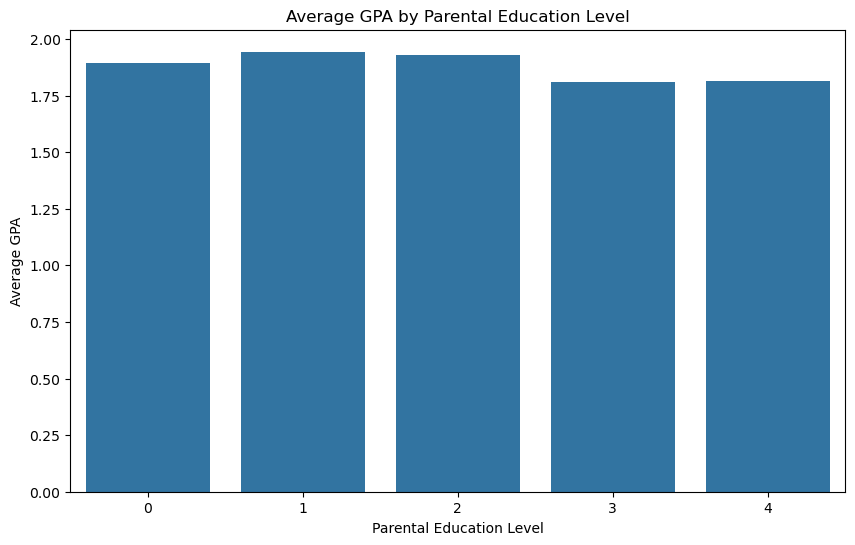

In [15]:
# Chart 5: Average GPA by Parental Education Level
plt.figure(figsize=(10, 6))
sns.barplot(x='ParentalEducation', y='GPA', data=student_data, ci=None)
plt.title('Average GPA by Parental Education Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Average GPA')
plt.show()


In [29]:
# Chart 6: Grade Distribution by Extracurricular Participation
plt.figure(figsize=(10, 6))
sns.countplot(x='GradeCategory', hue='Sports', data=student_data)
plt.title('Grade Distribution by Sports Participation')
plt.xlabel('Grade Category')
plt.ylabel('Count')
plt.legend(title='Sports Participation')
plt.show()

ValueError: Could not interpret value `GradeCategory` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

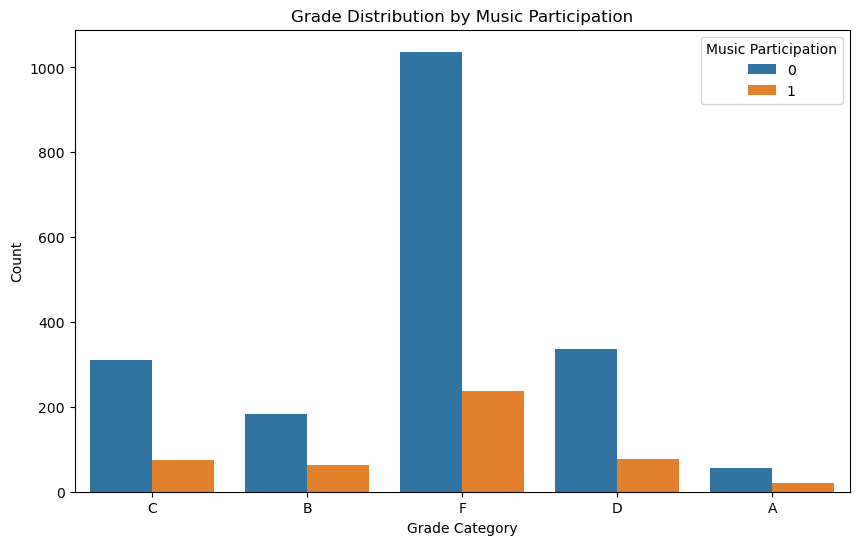

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='GradeCategory', hue='Music', data=student_data)
plt.title('Grade Distribution by Music Participation')
plt.xlabel('Grade Category')
plt.ylabel('Count')
plt.legend(title='Music Participation')
plt.show()

In [31]:
# Chi-Square Test
contingency_sports = pd.crosstab(student_data['Sports'], student_data['GradeCategory'])
contingency_music = pd.crosstab(student_data['Music'], student_data['GradeCategory'])
contingency_support = pd.crosstab(student_data['ParentalSupport'], student_data['GradeCategory'])
contingency_education = pd.crosstab(student_data['ParentalEducation'], student_data['GradeCategory'])

chi2_sports, p_sports, dof_sports, ex_sports = stats.chi2_contingency(contingency_sports)
chi2_music, p_music, dof_music, ex_music = stats.chi2_contingency(contingency_music)
chi2_support, p_support, dof_support, ex_support = stats.chi2_contingency(contingency_support)
chi2_education, p_education, dof_education, ex_education = stats.chi2_contingency(contingency_education)


KeyError: 'GradeCategory'

In [ ]:
# Display Chi-Square Test Results
results = {
    'Variable Pair': ['Sports vs. Grade', 'Music vs. Grade', 'Parental Support vs. Grade', 'Parental Education vs. Grade'],
    'Chi-Square Statistic': [chi2_sports, chi2_music, chi2_support, chi2_education],
    'p-value': [p_sports, p_music, p_support, p_education],
    'Degrees of Freedom': [dof_sports, dof_music, dof_support, dof_education]
}

results_df = pd.DataFrame(results)
print("Chi-Square Test Results")
print(results_df)


In [27]:
# Regression analysis for GPA
model = ols('GPA ~ C(Sports) + C(Music) + C(ParentalSupport) + C(ParentalEducation)', data=student_data).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     11.74
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           5.74e-20
Time:                        20:24:38   Log-Likelihood:                -3124.0
No. Observations:                2392   AIC:                             6270.
Df Residuals:                    2381   BIC:                             6333.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [34]:
# Logistic regression for grade classification
student_data['HighGrade'] = student_data['GradeClass'].apply(lambda x: 1 if x in [0, 1] else 0)
logit_model = logit('HighGrade ~ C(Sports) + C(Music) + C(ParentalSupport) + C(ParentalEducation)', data=student_data).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.422430
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              HighGrade   No. Observations:                 2392
Model:                          Logit   Df Residuals:                     2381
Method:                           MLE   Df Model:                           10
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                 0.02886
Time:                        18:18:53   Log-Likelihood:                -1010.5
converged:                       True   LL-Null:                       -1040.5
Covariance Type:            nonrobust   LLR p-value:                 3.547e-09
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.8380      0.337     -8.417      0.000      -3.